In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
fer_images = pd.read_csv('/Users/lab/Documents/Datasets/fer2013/fer2013.csv')

In [84]:
def makeMat(str_arr, size=(48,48)):
    vec = np.array(str_arr.split()).astype(float)
    return vec.reshape(48,48,1)

fer_images['mat'] = fer_images['pixels'].map(lambda x: makeMat(x))
print(fer_images.head())

   emotion                                             pixels     Usage  \
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training   
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training   
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training   
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training   
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training   

                                                 mat  
0  [[[70.0], [80.0], [82.0], [72.0], [58.0], [58....  
1  [[[151.0], [150.0], [147.0], [155.0], [148.0],...  
2  [[[231.0], [212.0], [156.0], [164.0], [174.0],...  
3  [[[24.0], [32.0], [36.0], [30.0], [32.0], [23....  
4  [[[4.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  


In [103]:
from sklearn.model_selection import train_test_split

x = np.array([mat for mat in fer_images.mat]) # (n_samples, img_width, img_height)

X_train, X_test, y_train, y_test = train_test_split(
    x, fer_images['emotion'].values,
    test_size=0.33, random_state=42)
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 1)
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
print(X_train[0].shape)

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 7)
Y_test = np_utils.to_categorical(y_test, 7)

(24044, 48, 48, 1)


ValueError: cannot reshape array of size 55397376 into shape (24044,1)

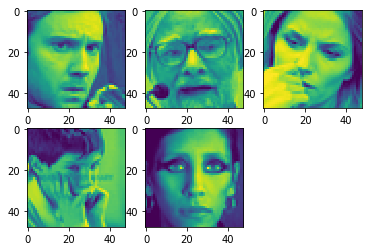

In [4]:
fig = plt.figure()
x = 1
for i in fer_images['mat'].head().values:
    fig.add_subplot(2,3,x)
    imgplt = plt.imshow(i)
    x += 1

In [11]:
import os
import dlib
from PIL import Image


imgs = []
index = []
for root,dirs,files in os.walk('/Users/lab/Documents/Datasets/ulitmateEmotion/emotion', topdown=False):
    if(root.find('\\') != -1):
        print(root)
        emotion = root.split('\\')[1]
        for file in files:
            if file.find('.jpg') != -1 or file.find('.jpeg') != -1:
                img = Image.open(os.path.join(root,file)).convert('L')
                img_arr = np.asarray(img, dtype=np.uint8)
                imgs.append(img_arr)
                index.append(emotion)

img_ser = Series(Series(imgs, index=index))
print(img_ser.head())

/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\anger
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\disgust
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\fear
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\happiness
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\neutral
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\sadness
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\silly
/Users/lab/Documents/Datasets/ulitmateEmotion/emotion\surprise
anger    [[152, 166, 184, 189, 188, 186, 190, 196, 198,...
anger    [[114, 74, 60, 53, 56, 68, 59, 54, 58, 58, 61,...
anger    [[41, 120, 176, 165, 177, 169, 171, 166, 160, ...
anger    [[143, 145, 142, 134, 132, 137, 141, 139, 140,...
anger    [[153, 166, 178, 181, 179, 178, 178, 176, 172,...
dtype: object


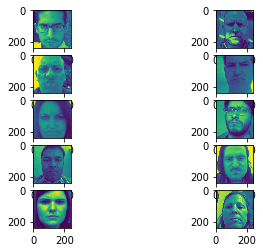

In [15]:
fig = plt.figure()
x = 1
for img in img_ser[:10]:
    fig.add_subplot(5,2,x)
    plt.imshow(img)
    x += 1

### todo:
- crop faces
- scale to 90x90
- export all faces to folder
- test model

## Detect faces

In [43]:
detector = dlib.get_frontal_face_detector()
win = dlib.image_window()

def drawRectangle(arr, rec):
    (l, t, r, b) = rec
    if l <= 0:
        l = 0
    if t <= 0:
        t = 0
    if r >= 239:
        r = 239
    if b >= 239:
        b = 239
#     arr[t, l:r] = 240 #draw top
#     arr[b, l:r] = 240 #draw bottom
#     arr[t:b, l] = 240 #draw left
#     arr[t:b, r] = 240 # draw right
    arr[t:b, l:r] = 240
    
    return arr

fig = plt.figure()
x = 1

imgs = {'img':[], 'rec':[]}

for img in img_ser:
    img_copy = img.copy()
    dets = detector(img_copy)
    for i, d in enumerate(dets):
        rec = (d.left(), d.top(), d.right(), d.bottom())
#         fig.add_subplot(5,5,x)
#         x += 1
#         plt.imshow(drawRectangle(img_copy, rec))
        imgs['img'].append(img_copy)
        imgs['rec'].append(rec)
        
crop_df = DataFrame.from_dict(imgs)

(240, 240)


## Crop Faces and Scale

(480, 520)
nope
(480, 520)
nope
(480, 568)
nope
(480, 482)
nope
(480, 578)
nope
(480, 564)
nope
(480, 606)
nope
(480, 640)
nope
(480, 520)
nope
(480, 528)
nope
(480, 572)
nope
(480, 592)
nope
(480, 492)
nope
(480, 608)
nope
(480, 590)
nope
(480, 540)
nope


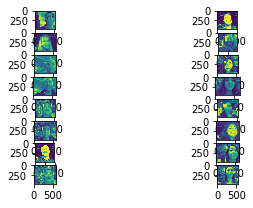

In [105]:
import math

def makeSquare(rec):
    (l, t, r, b) = rec
    w = r - l
    h = b - t
    
    mid = (t+(h/2), l+(w/2))

    if w < h:
        diff = h - w
        l -= math.floor(diff/2)
        r += math.floor(diff/2)
    else:
        diff = w - h
        t -= math.floor(diff/2)
        b += math.floor(diff/2)
    
    if l >= 239 or t >= 239 or r >= 239 or b >= 239:
        print('nope')
    return (l, t, r ,b)

x = 1
fig = plt.figure()

for i in range(500):
    shape = crop_df.iloc[i]['img'].shape
    if shape[0] != shape[1]:
        print(shape)
        rec = makeSquare(crop_df.iloc[i]['rec'])
        fig.add_subplot(10,2,x)
        x += 1
        plt.imshow(drawRectangle(crop_df.iloc[i]['img'], rec))    
